In [1]:
import matplotlib.pyplot as plt
import matplotlib
import json
import os
from datetime import datetime
import pandas as pd

# Map data for later retrieval

In [2]:
mdt_to_filename = {}

for filename in os.listdir('../pol-mementos'):
    
    if '.html.noboilerplate.txt' in filename:
        #2018-09-22T11:33:59Z
        dt = filename.replace('.html.noboilerplate.txt', '')

        mdt = datetime.strptime(dt, '%Y-%m-%dT%H:%M:%SZ')

        mdt_to_filename[mdt] = '../pol-mementos/' + filename
        
print("loaded {} mappings".format(len(mdt_to_filename)))

loaded 4245 mappings


In [3]:
wikipedia_events = [
    datetime(2014, 9, 18), # Gamergate
    datetime(2015, 1, 1), # Swatting incidents
    datetime(2016, 6, 22), # Trump's "Star of David" image posted to 8chan
    datetime(2016, 8, 1), # Blacklisted from Google Search for child porn
    datetime(2018, 3, 14 ), # QAnon is kicked off of Reddit
    datetime(2018, 9, 1), # Louisiana's Antifa List
    datetime(2018, 9, 12 ), # QAnon is kicked off of Reddit for the second time
    datetime(2018, 9, 19 ), # 8chan updates its servers to handle additional load
    datetime(2019, 3, 15), # Christchurch mosque shootings
    datetime(2019, 4, 27), # Poway synagogue shooting
    datetime(2019, 8, 3) # El Paso Shooting
#     datetime(2019, 8, 4) # Dayton Shooting  
]

In [4]:
# find memento closest to event datetime
# compute jaccard distance of that memento to others

# Trump's "Star of David"

In [5]:
from datetime import timedelta

# "Star of David" event
event_dt = datetime(2016, 6, 22)

def get_bestdt_for_event(edt):

    far_past = datetime(1970, 1, 1)
    far_future = datetime(2161, 8, 12)

    mindist = far_future - far_past
    best_dt = None

    for mdt in mdt_to_filename:

        if abs(event_dt - mdt) < mindist:
            mindist = event_dt - mdt
            best_dt = mdt
            
    return best_dt

best_dt = get_bestdt_for_event(event_dt)

In [6]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from distance import jaccard

stop_words = set(stopwords.words('english'))

best_filename = mdt_to_filename[best_dt]

save_terms_for_filename = {}

def get_terms(filename):
    with open(filename) as f:
        data = f.read()

    word_tokens = word_tokenize(data)

    for p in string.punctuation:
        if p in word_tokens:
            word_tokens.remove(p)

    terms = []

    for w in word_tokens:
        if w not in stop_words:
            terms.append(w)
            
    return terms
            
best_terms = get_terms(best_filename)

distance_by_mdt_distance = {}
   
for mdt in mdt_to_filename:
    
    filename = mdt_to_filename[mdt]
    
    terms = get_terms(filename)
    
    save_terms_for_filename[filename] = terms
    
    mdt_distance = abs(mdt - best_dt)
    
#     print("{} is {} terms long".format(mdt, len(terms)))
    
    try:
        distance_by_mdt_distance[ mdt_distance ] = jaccard(terms, best_terms)
    except TypeError as e:
        print("empty set? {}".format(e))
    

In [7]:
distance_by_mdt_distance

{datetime.timedelta(days=524, seconds=36469): 0.8473816858022962,
 datetime.timedelta(days=523, seconds=54593): 0.8571820928316396,
 datetime.timedelta(days=521, seconds=74397): 0.8557386527898236,
 datetime.timedelta(days=519, seconds=4851): 0.8563342318059299,
 datetime.timedelta(days=515, seconds=55826): 0.8478321678321679,
 datetime.timedelta(days=509, seconds=23161): 0.8554327808471455,
 datetime.timedelta(days=500, seconds=64299): 0.8553977272727273,
 datetime.timedelta(days=498, seconds=79884): 0.8478945860784876,
 datetime.timedelta(days=492, seconds=47047): 0.853310502283105,
 datetime.timedelta(days=489, seconds=71584): 0.8540497193263833,
 datetime.timedelta(days=486, seconds=52932): 0.85374619850705,
 datetime.timedelta(days=483, seconds=74499): 0.8505268996117582,
 datetime.timedelta(days=480, seconds=84561): 0.8513111651797783,
 datetime.timedelta(days=480, seconds=25770): 0.8530486091598763,
 datetime.timedelta(days=477, seconds=80410): 0.8459335624284078,
 datetime.time

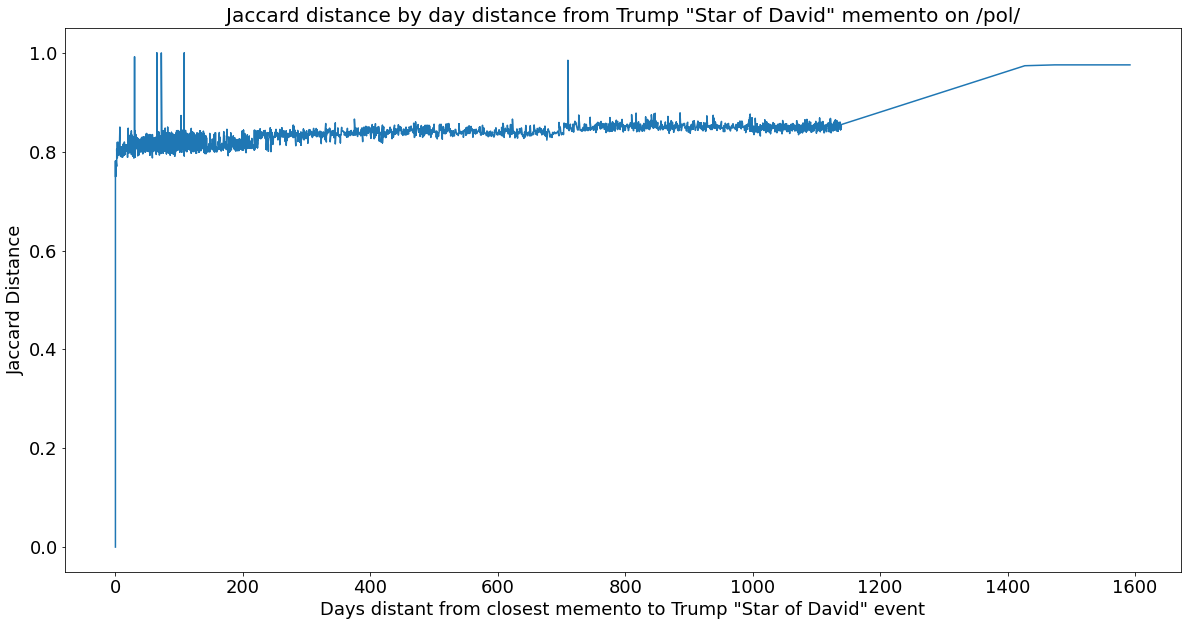

In [8]:
x = []
y = []

fig, ax = plt.subplots(figsize=(20, 10))

for mdt_distance in sorted(distance_by_mdt_distance):
    x.append(mdt_distance.days)
    y.append(distance_by_mdt_distance[mdt_distance])
    
ax.set_title("Jaccard distance by day distance from Trump \"Star of David\" memento on /pol/", fontsize=20)
ax.set_ylabel("Jaccard Distance", fontsize=18)
ax.set_xlabel("Days distant from closest memento to Trump \"Star of David\" event", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(x, y)

# Christchuch shooting

In [9]:
event_dt = datetime(2019, 3, 15)
best_dt = get_bestdt_for_event(event_dt)
best_filename = mdt_to_filename[best_dt]
best_terms = get_terms(best_filename)

for mdt in mdt_to_filename:
    
    filename = mdt_to_filename[mdt]
    
    terms = save_terms_for_filename[filename]
    
    mdt_distance = abs(mdt - best_dt)
    
#     print("{} is {} terms long".format(mdt, len(terms)))
    
    try:
        distance_by_mdt_distance[ mdt_distance ] = jaccard(terms, best_terms)
    except TypeError as e:
        print("empty set? {}".format(e))
    

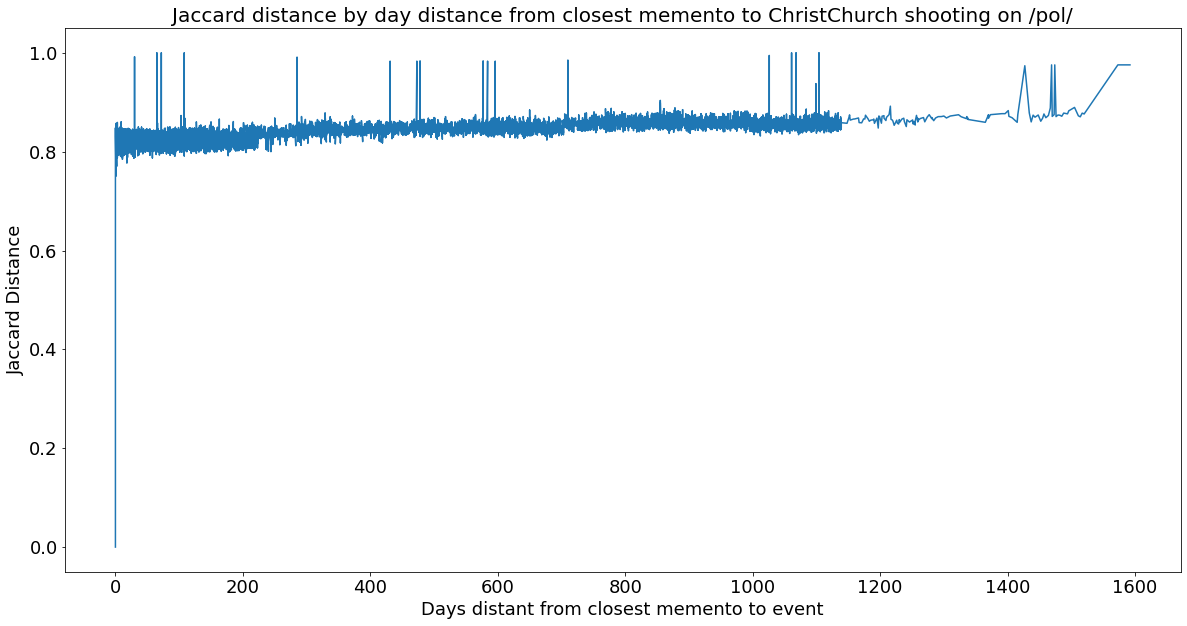

In [10]:
x = []
y = []

fig, ax = plt.subplots(figsize=(20, 10))

for mdt_distance in sorted(distance_by_mdt_distance):
    x.append(mdt_distance.days)
    y.append(distance_by_mdt_distance[mdt_distance])
    
ax.set_title("Jaccard distance by day distance from closest memento to ChristChurch shooting on /pol/", fontsize=20)
ax.set_ylabel("Jaccard Distance", fontsize=18)
ax.set_xlabel("Days distant from closest memento to event", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(x, y)

# El Paso Shooting

In [11]:
event_dt = datetime(2019, 8, 3)
best_dt = get_bestdt_for_event(event_dt)
best_filename = mdt_to_filename[best_dt]
best_terms = get_terms(best_filename)

for mdt in mdt_to_filename:
    
    filename = mdt_to_filename[mdt]
    
    terms = save_terms_for_filename[filename]
    
    mdt_distance = abs(mdt - best_dt)
    
#     print("{} is {} terms long".format(mdt, len(terms)))
    
    try:
        distance_by_mdt_distance[ mdt_distance ] = jaccard(terms, best_terms)
    except TypeError as e:
        print("empty set? {}".format(e))
    

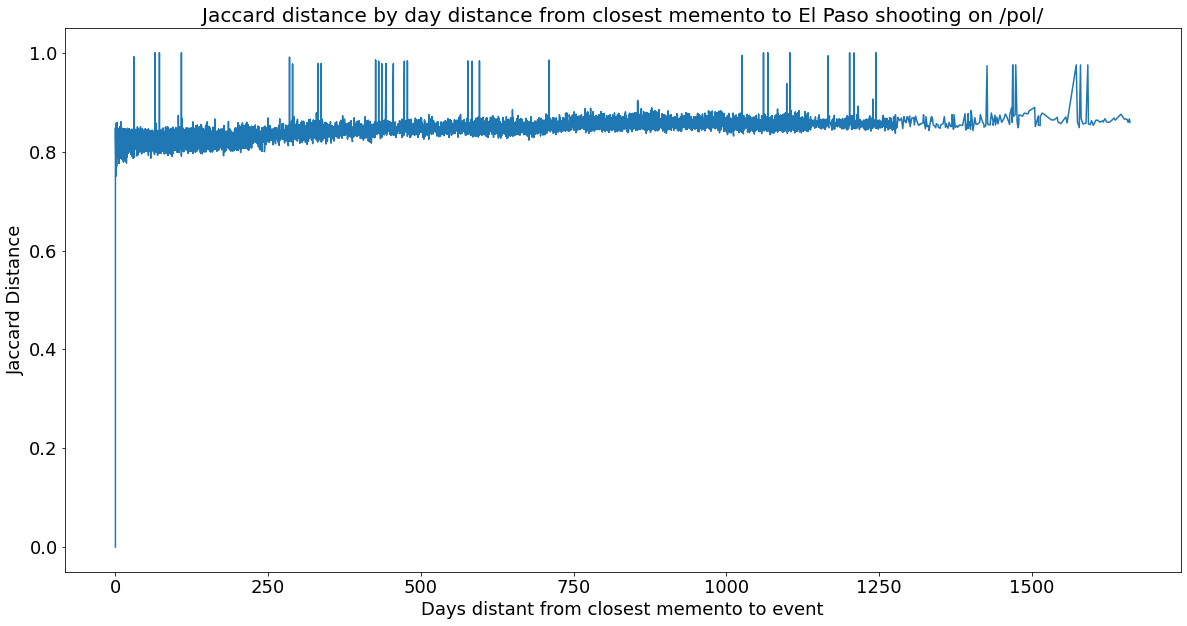

In [12]:
x = []
y = []

fig, ax = plt.subplots(figsize=(20, 10))

for mdt_distance in sorted(distance_by_mdt_distance):
    x.append(mdt_distance.days)
    y.append(distance_by_mdt_distance[mdt_distance])
    
ax.set_title("Jaccard distance by day distance from closest memento to El Paso shooting on /pol/", fontsize=20)
ax.set_ylabel("Jaccard Distance", fontsize=18)
ax.set_xlabel("Days distant from closest memento to event", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(x, y)